In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pycountry


In [18]:
plt.style.use('default')

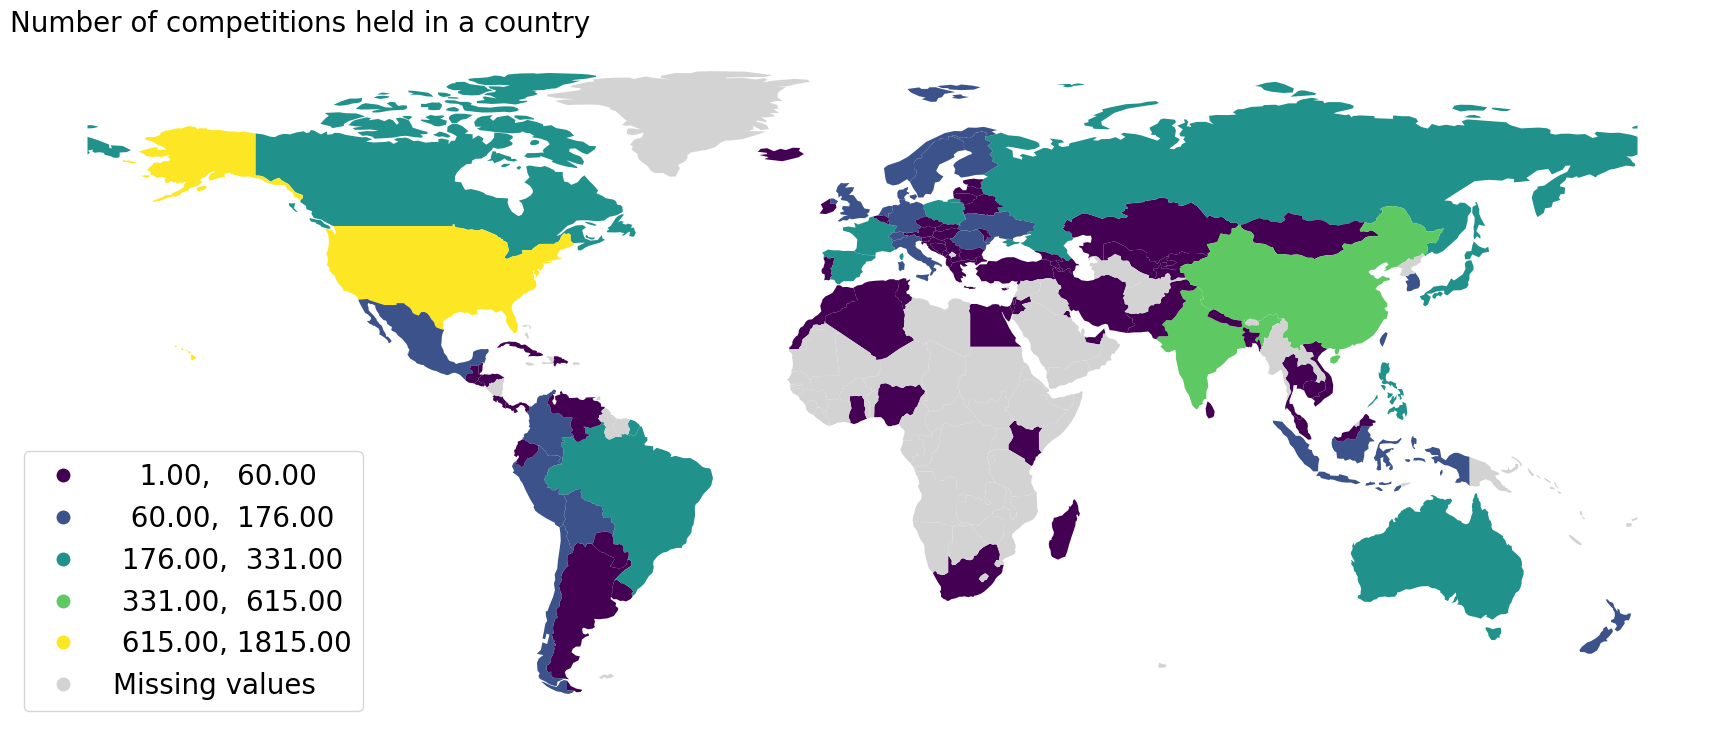

In [4]:
# World map plot of countries where cubing competitions have been held

countryComps = pd.read_csv("../datasets/countryComps.csv", delimiter=',')
countryComps = countryComps.sort_values(['count'], ascending=False).reset_index().drop(columns=['index'])
countryComps['iso3'] = np.NAN

for i in range(len(countryComps)):
    countryComps.at[i, 'iso3'] = pycountry.countries.get(alpha_2=countryComps.iloc[i]['iso2']).alpha_3

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")].reset_index().drop(columns=['index'])

world['count'] = np.NAN
for i in range(len(world)):
    code = world.iloc[i].iso_a3
    row = countryComps[countryComps['iso3'] == code]
    if len(row) == 0:
        world.at[i, 'count'] = np.nan
    else:
        world.at[i, 'count'] = row['count']

plt.rcParams['figure.figsize'] = (22, 12)
fig = world.plot(column='count',
            cmap='viridis',
            scheme='FisherJenks',
            missing_kwds={
            "color": "lightgrey",
                "label": "Missing values",},
            legend=True,
            legend_kwds={"loc":"lower left", "fontsize":20})
fig.set_title('Number of competitions held in a country', fontsize=20, loc='left')
fig.set_axis_off()
fig = fig.get_figure()
# fig.savefig('../images/plot.svg', bbox_inches='tight', dpi=1200, format='svg')


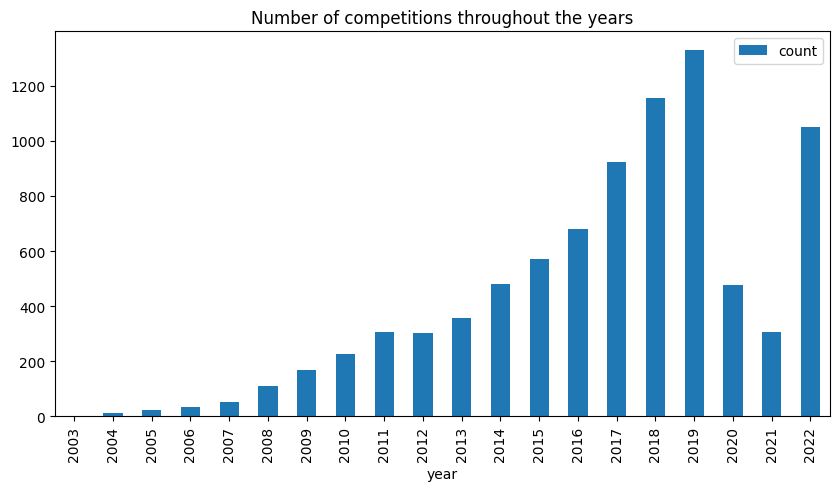

In [20]:
# How many competition have been held during each year

compsByYear = pd.read_csv('../datasets/compCountByYear.csv')
plt.rcParams['figure.figsize'] = (10, 5)
fig = compsByYear.plot(kind='bar', x='year', y='count', title='Number of competitions throughout the years')
# fig.savefig('../images/test2.png', bbox_inches='tight')

<AxesSubplot: title={'center': 'Number of competitions throughout the years'}, xlabel='year'>

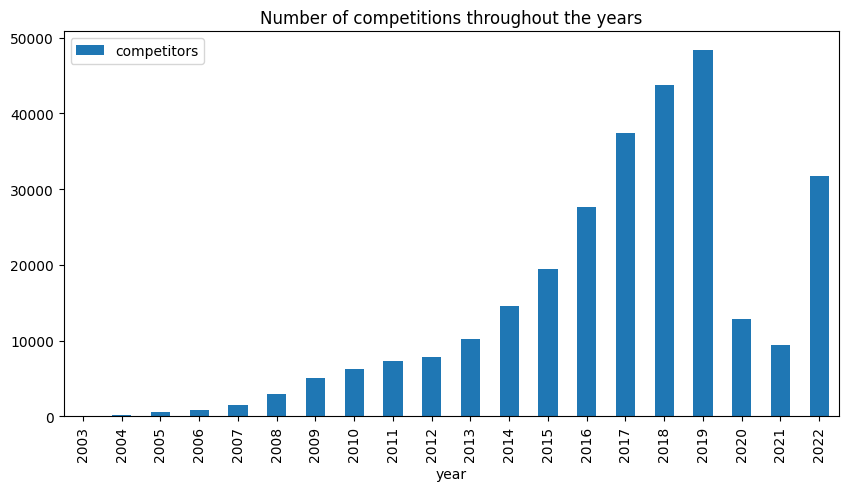

In [21]:
competitorsByYear = pd.read_csv('../datasets/competitorsByYear.csv')
competitorsByYear.plot(kind='bar', x='year', y='competitors', title='Number of competitions throughout the years')

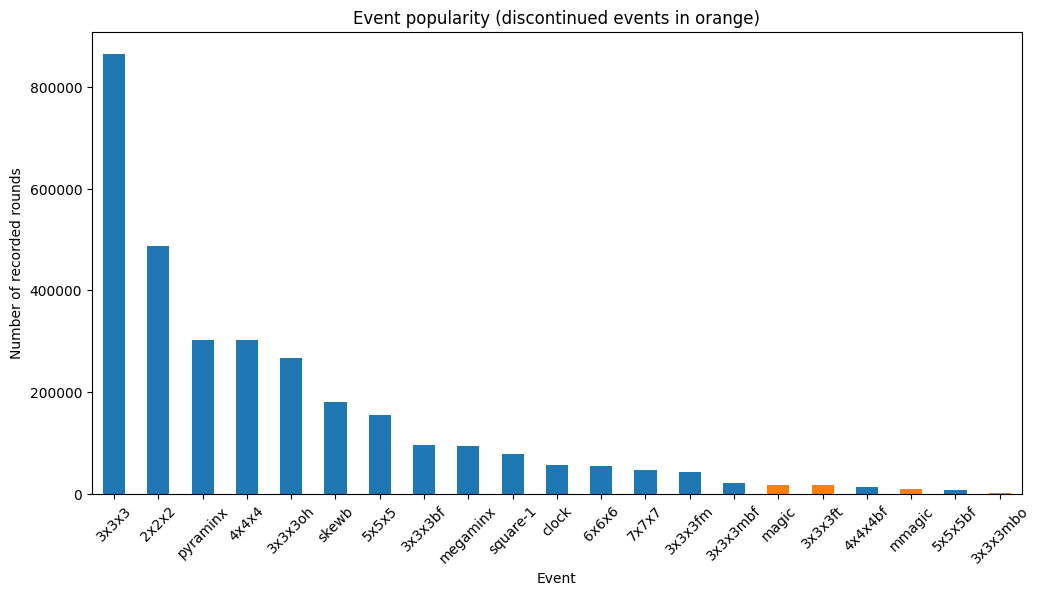

In [76]:
# Number of registered rounds by different events

eventCountDf = pd.read_csv("../datasets/eventCountDisc.csv")
plt.rcParams['figure.figsize'] = (12, 6)
ax = eventCountDf.plot(kind='bar', stacked=True, legend=False, ylabel="Number of recorded rounds", xlabel="Event")
ax.set_xticks(ticks=eventCountDf.index, labels=eventCountDf.event, rotation=45)
ax.set_title("Event popularity (discontinued events in orange)")
# fig = ax.get_figure()
# fig.savefig('../images/plot2.svg', bbox_inches='tight', dpi=1200, format='svg')



C:\Users\karlo\AppData\Local\Temp\ipykernel_82460\183482915.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  compParticipationsFreq[:10].plot(kind='bar', xlabel="Number of competitions participated", ylabel="Percentage of all competitors", title="Share of all competitors (~170000) that have participated at X competitions")


<AxesSubplot: title={'center': 'Share of all competitors (~170000) that have participated at X competitions'}, xlabel='Number of competitions participated', ylabel='Percentage of all competitors'>

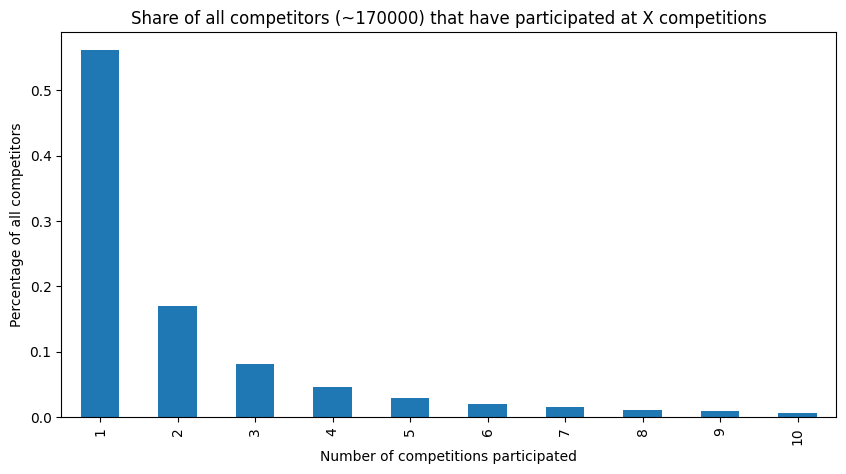

In [8]:
# Proportion of competitors that have participated at X competitions

plt.rcParams['figure.figsize'] = (10, 5)
compParticipations = pd.read_csv("../datasets/compsParticipated.csv")
compParticipationsFreq = compParticipations.value_counts().sort_index()
compParticipationsFreq = compParticipationsFreq / sum(compParticipationsFreq)
compParticipationsFreq.index = list(x[0] for x in compParticipationsFreq.index)

compParticipationsFreq[:10].plot(kind='bar', xlabel="Number of competitions participated", ylabel="Percentage of all competitors", title="Share of all competitors (~170000) that have participated at X competitions")

<AxesSubplot: title={'center': 'Number of world records achieved by country'}, xlabel='Countries', ylabel='Records'>

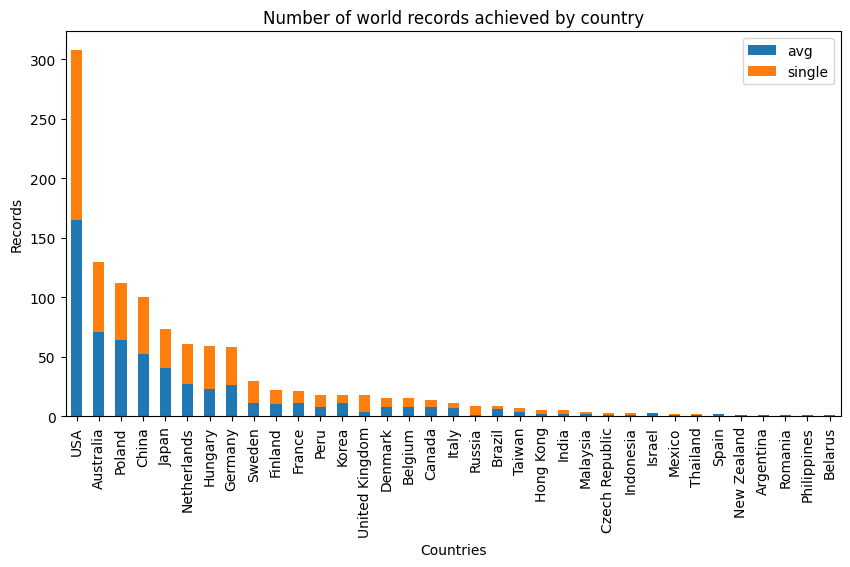

In [86]:
# Number of records achieved by country (+ what proportion of WR were made up of AVG/SINGLES)

countryWRsSplit = pd.read_csv('../datasets/countriesByWRsSplit.csv')
countryWRsSplit = countryWRsSplit.drop(columns=['country2'])
sorted_indices = (countryWRsSplit['avg'] + countryWRsSplit['single']).sort_values(ascending=False).index
countryWRsSplit = countryWRsSplit.loc[sorted_indices, :]
countryWRsSplit.plot(kind='bar', x='country', stacked=True, xlabel='Countries', ylabel='Records', title='Number of world records achieved by country')

<AxesSubplot: title={'center': 'Number of average world records per country representative'}, xlabel='Countries', ylabel='Records per person'>

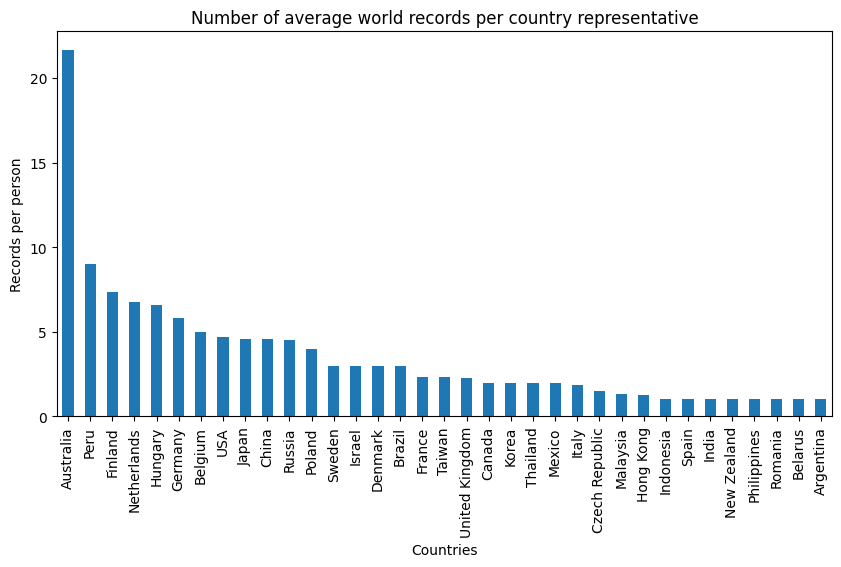

In [87]:
# Number of average world records per country representative (who have achieved WRs)

countryWRs = pd.read_csv('../datasets/countriesByWRs.csv')
countryWRs['records'] = countryWRs['records'] / countryWRs['individuals']
countryWRs = countryWRs.sort_values(by=['records'], ascending=False)
countryWRs.plot(kind='bar',x='country', y='records', legend=False, xlabel='Countries', ylabel='Records per person', title='Number of average world records per country representative')


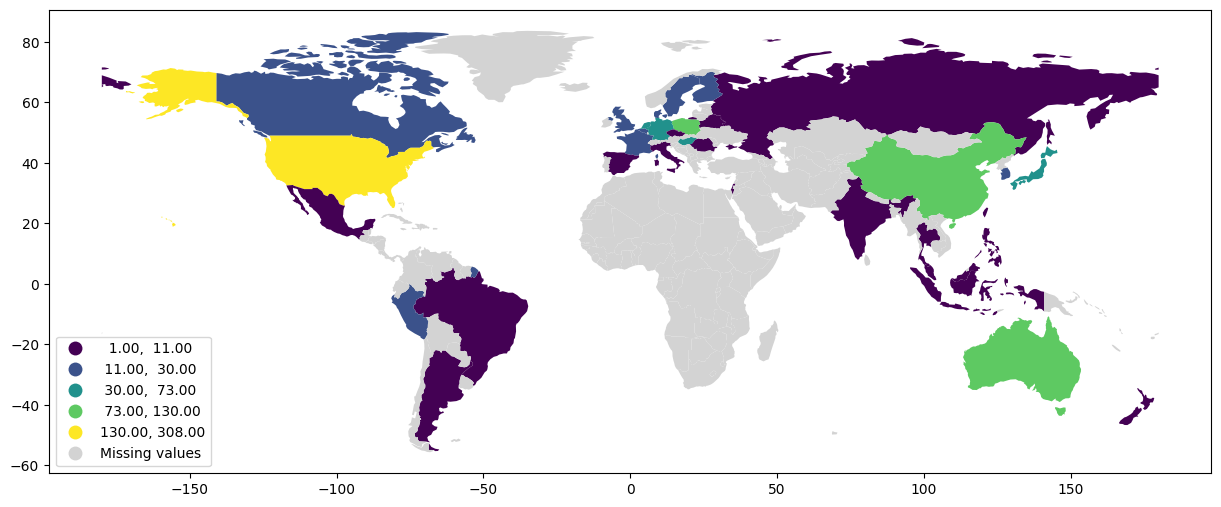

In [13]:
# Similar world-heatmap that displays WR distribution visually

countryWRsCC = pd.read_csv('../datasets/countriesByWRsISO3.csv')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")].reset_index().drop(columns=['index'])

world['records'] = np.NAN
for i in range(len(world)):
    code = world.iloc[i].iso_a3
    row = countryWRsCC[countryWRsCC['iso3'] == code]

    if len(row) == 0:
        world.at[i, 'records'] = np.nan
    else:
        world.at[i, 'records'] = row['records']

plt.rcParams['figure.figsize'] = (15, 10)
fig = world.plot(column='records',
            cmap='viridis',
            scheme='FisherJenks',
             legend=True,
            legend_kwds={"loc":"lower left", "fontsize":10},
            missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },)
